<h1><b>Data analysis of relationship between Macro-Econmics and starting salary of graduates</b><h1>

<h3>Name: Li Yongjie</h3>
<h3>ID: 2342377</h3>
<h3>Class: DAAA/FT/1B/01</h3>

<hr>


## Importing nessacary libraries and dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf

gdpDf= pd.read_csv('./Data/world-gdp.csv',
                    header=2)

inflationRateDf = pd.read_csv('./Data/singapore-inflation-rate.csv',
                              header=9, 
                              skipfooter=29,
                              na_values="na")

# https://www.macrotrends.net/countries/SGP/singapore/unemployment-rate#:~:text=Unemployment%20refers%20to%20the%20share,a%200.56%25%20decline%20from%202020.
unemploymentRateDf = pd.read_csv('./Data/singapore-unemployment-rate.csv',
                                 header=9)

GES_Df = pd.read_csv('./Data/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv', na_values='na')


C:\Users\yongj\AppData\Local\Temp\ipykernel_18396\4117799838.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  inflationRateDf = pd.read_csv('./Data/singapore-inflation-rate.csv',


In [3]:
# Set the style for plots
plt.style.use('seaborn-v0_8-darkgrid')

<hr>

## Text Based Analysis

In [4]:
# Creating function to get information from data
def get_info(df, name):
    print(60*"*" ,f"\nInformation on {name}", '\n' + "*"*60 + '\n') 
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset\n')
    print(f'The names of the columns are')
    for col in df.columns:
        print(f'- {col} ({df[col].dtypes}), na values: {df[col].isna().sum()}, unique values: {len(list(df[col].unique()))}')

In [5]:
get_info(gdpDf, "GDP")

************************************************************ 
Information on GDP 
************************************************************

There are 266 rows and 68 columns in this dataset

The names of the columns are
- Country Name (object), na values: 0, unique values: 266
- Country Code (object), na values: 0, unique values: 266
- Indicator Name (object), na values: 0, unique values: 1
- Indicator Code (object), na values: 0, unique values: 1
- 1960 (float64), na values: 140, unique values: 125
- 1961 (float64), na values: 139, unique values: 127
- 1962 (float64), na values: 138, unique values: 127
- 1963 (float64), na values: 138, unique values: 127
- 1964 (float64), na values: 138, unique values: 128
- 1965 (float64), na values: 126, unique values: 139
- 1966 (float64), na values: 123, unique values: 143
- 1967 (float64), na values: 120, unique values: 145
- 1968 (float64), na values: 115, unique values: 150
- 1969 (float64), na values: 115, unique values: 150
- 1970 (float6

In [6]:
get_info(inflationRateDf, "Inflation Rate")

************************************************************ 
Information on Inflation Rate 
************************************************************

There are 8 rows and 35 columns in this dataset

The names of the columns are
- Data Series (object), na values: 0, unique values: 5
- 2023  (float64), na values: 0, unique values: 8
- 2022  (float64), na values: 0, unique values: 8
- 2021  (float64), na values: 0, unique values: 8
- 2020  (float64), na values: 0, unique values: 8
- 2019  (float64), na values: 0, unique values: 5
- 2018  (float64), na values: 0, unique values: 8
- 2017  (float64), na values: 0, unique values: 7
- 2016  (float64), na values: 0, unique values: 8
- 2015  (float64), na values: 0, unique values: 8
- 2014  (float64), na values: 3, unique values: 6
- 2013  (float64), na values: 6, unique values: 3
- 2012  (float64), na values: 6, unique values: 3
- 2011  (float64), na values: 6, unique values: 3
- 2010  (float64), na values: 6, unique values: 3
- 2009  (flo

In [7]:
get_info(unemploymentRateDf, "Unemployment Rate")

************************************************************ 
Information on Unemployment Rate 
************************************************************

There are 32 rows and 4 columns in this dataset

The names of the columns are
- date (object), na values: 0, unique values: 32
-  Unemployment Rate (%) (float64), na values: 0, unique values: 32
-  Annual Change (float64), na values: 1, unique values: 28
-   (float64), na values: 32, unique values: 1


In [8]:
get_info(GES_Df, "Graduate Employment Survey")

************************************************************ 
Information on Graduate Employment Survey 
************************************************************

There are 1121 rows and 12 columns in this dataset

The names of the columns are
- year (int64), na values: 0, unique values: 9
- university (object), na values: 0, unique values: 6
- school (object), na values: 28, unique values: 68
- degree (object), na values: 0, unique values: 337
- employment_rate_overall (float64), na values: 89, unique values: 226
- employment_rate_ft_perm (float64), na values: 89, unique values: 393
- basic_monthly_mean (float64), na values: 89, unique values: 798
- basic_monthly_median (float64), na values: 89, unique values: 182
- gross_monthly_mean (float64), na values: 89, unique values: 796
- gross_monthly_median (float64), na values: 89, unique values: 237
- gross_mthly_25_percentile (float64), na values: 89, unique values: 175
- gross_mthly_75_percentile (float64), na values: 89, unique val

### Dataset 1 - GDP

In [9]:
gdpDf

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.382914e+11,4.201178e+11,4.052709e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10,NaN


### Dataset 2 - Inflation Rate

In [10]:
inflationRateDf

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,MAS Core Inflation Measure (Index),109.274,104.918,100.769,99.845,100.0,98.966,97.327,95.933,95.076,...,72.736,72.376,72.091,70.997,69.744,68.246,66.562,65.398,64.359,62.094
1,Percent Change Over Corresponding Period Of ...,4.200,4.100,0.900,-0.200,1.0,1.700,1.500,0.900,0.500,...,0.500,0.400,1.500,1.800,2.200,2.500,1.800,1.600,3.600,NaN
2,Services Inflation Measure (Index),107.701,103.899,100.710,99.460,100.0,98.448,97.033,95.577,94.435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Percent Change Over Corresponding Period Of ...,3.700,3.200,1.300,-0.500,1.6,1.500,1.500,1.200,0.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Retail & Other Goods Inflation Measure (Index),101.656,99.354,97.387,98.501,100.0,100.140,98.769,98.577,98.304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Percent Change Over Corresponding Period Of ...,2.300,2.000,-1.100,-1.500,-0.1,1.400,0.200,0.300,0.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Electricity & Gas Inflation Measure (Index),115.202,111.263,93.026,91.638,100.0,105.006,95.831,87.893,99.649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Percent Change Over Corresponding Period Of ...,3.500,19.600,1.500,-8.400,-4.8,9.600,9.000,-11.800,-14.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset - 3 Unemployment Rate

In [11]:
unemploymentRateDf.head()

,date,Unemployment Rate (%),Annual Change,
0,1991-12-31,2.18,NaN,NaN
1,1992-12-31,3.09,0.91,NaN
2,1993-12-31,3.07,-0.02,NaN
3,1994-12-31,3.03,-0.04,NaN
4,1995-12-31,3.30,0.27,NaN


### Dataset - 4 Graduate Employment Survey

In [12]:
GES_Df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557.0,3400.0,3615.0,3400.0,3000.0,4100.0
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494.0,3500.0,3536.0,3500.0,3100.0,3816.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2021,Singapore University of Social Sciences,School of Business,Bachelor of Science in Supply Chain Management,97.4,79.5,3245.0,3200.0,3381.0,3300.0,3025.0,3500.0
1117,2021,Singapore University of Technology and Design,NaN,Bachelor of Engineering (Computer Science and ...,98.3,96.7,4936.0,4800.0,5030.0,4800.0,4400.0,5414.0
1118,2021,Singapore University of Technology and Design,NaN,Bachelor of Engineering (Engineering Product D...,89.9,85.5,4047.0,4000.0,4141.0,4000.0,3750.0,4500.0
1119,2021,Singapore University of Technology and Design,NaN,Bachelor of Engineering (Engineering Systems a...,95.5,90.9,4542.0,4500.0,4778.0,4700.0,3900.0,5000.0


<hr>
Since the intersect of all the year from each dataset is 2013-2021, we will have to subset the dataframes to only contain the range of year from 2013-2021

Dataset 1: Since we are doing research on Singapore, we only have to look at Singapore and World GDP per capita to see how World's GDP per capita affects employment salary ad well as Singapore's own GDP per capita, we also need to convert the years from columns to rows and subset the years from 2013 - 2022

### Preparing GDP Dataset

Since we want to know how GDP affects salary in Singapore, we will only be looking at the Worlds and Singapore's GDP

In [13]:
# Select only Singapore and World GDP Per Capita
gdp_filtered = gdpDf[gdpDf['Country Name'].isin(['Singapore', 'World'])]

# Since columns names contain str values we will have to subset the data using iloc
index_of_2015 = gdp_filtered.columns.get_loc('2013')
index_of_2021 = gdp_filtered.columns.get_loc('2021')

# Select year from 2013 to 2022, this will also remove unwanted columns such as country code, country name and 
gdp_filtered = gdp_filtered.iloc[:, index_of_2015:index_of_2021 + 1]

# Verify Changes made
gdp_filtered

,2013,2014,2015,2016,2017,2018,2019,2020,2021
208,3.075764e+11,3.148636e+11,3.079985e+11,3.190301e+11,3.432729e+11,3.768695e+11,3.768376e+11,3.483921e+11,4.237971e+11
259,7.771472e+13,7.983716e+13,7.528327e+13,7.651898e+13,8.148410e+13,8.654268e+13,8.777740e+13,8.525774e+13,9.752968e+13


Now we will need to convert the years from columns into rows by getting the transpose of the dataset

In [14]:
# Conver year to column by getting the transpose and reseting index
gdp_filtered = gdp_filtered.T.reset_index()

# Rename the columns containing GDP values
gdp_filtered.rename(columns={208: 'Singapore_USD_Billion', 259: 'World_USD_Billion', "index": 'year'}, inplace=True)

# # Convert the unit into billion for easier visualization
gdp_filtered[['Singapore_USD_Billion', 'World_USD_Billion']] = gdp_filtered[['Singapore_USD_Billion', 'World_USD_Billion']].div(10**9)

# Convert year to int value
gdp_filtered['year']=gdp_filtered['year'].astype(int)

# Verify Changes made
gdp_filtered

,year,Singapore_USD_Billion,World_USD_Billion
0,2013,307.576361,77714.723868
1,2014,314.863581,79837.156825
2,2015,307.998545,75283.270552
3,2016,319.030058,76518.978974
4,2017,343.272879,81484.101071
5,2018,376.869492,86542.678179
6,2019,376.837580,87777.403956
7,2020,348.392091,85257.737350
8,2021,423.797101,97529.676807


<Axes: xlabel='year', ylabel='World_USD_Billion'>

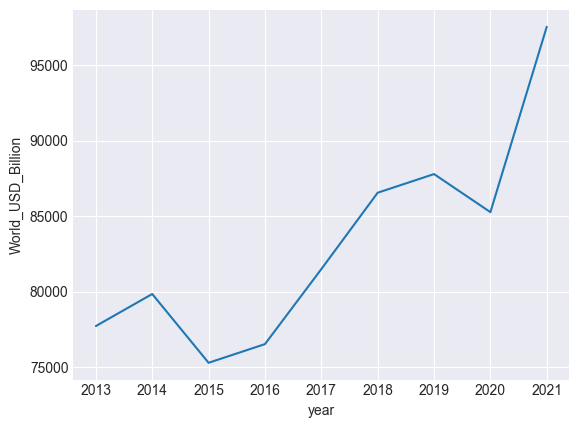

In [43]:
sns.lineplot(data=gdp_filtered, x='year', y='World_USD_Billion')
# sns.lineplot(data=gdp_filtered, x='year', y='Singapore_USD_Billion')


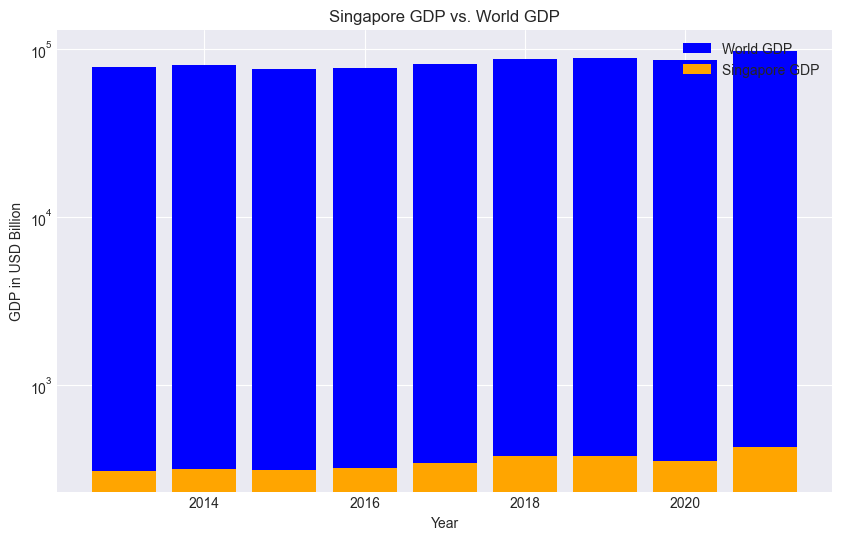

In [15]:
plt.figure(figsize=(10, 6))

# Stacked bar plot
plt.bar(gdp_filtered['year'], gdp_filtered['World_USD_Billion'], color='blue', label='World GDP')
plt.bar(gdp_filtered['year'], gdp_filtered['Singapore_USD_Billion'], color='orange', label='Singapore GDP')

plt.xlabel('Year')
plt.ylabel('GDP in USD Billion')
plt.title('Singapore GDP vs. World GDP')
plt.legend()
plt.yscale('log')


plt.show()

In [72]:
# singapore_percent_of_world = (gdp_filtered['Singapore_USD_Billion'].sum()/gdp_filtered['World_USD_Billion'].sum())*100


# size = [singapore_percent_of_world, 100-singapore_percent_of_world]
# labels = ["Singapore", "Rest of the World"]

# plt.figure(figsize=(8, 8))
# plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=140, explode=(0.1,0))
# plt.annotate('0.4%', xy=(0.5, -0.5), xytext=(0.7, -0.7),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=12, ha='center')
# plt.title('Example Pie Chart with 0.4%')
# plt.show()


### Dataset 2

In [17]:
inflationRateDf_filtered = inflationRateDf.set_index(['Data Series']).T
inflationRateDf_filtered = inflationRateDf_filtered.iloc[2:11, [0,2,4,6]].sort_index(ascending=True).reset_index()
inflationRateDf_filtered

# Change the year from index to new column
inflationRateDf_filtered.sort_index(ascending=True).reset_index(inplace=True)

# Rename column from index to year
inflationRateDf_filtered.rename(columns={'index': 'year',
                                        'MAS Core Inflation Measure (Index)':"MAX_Core_Inflation", 
                                        'Services Inflation Measure (Index)': "Services_Inflation",
                                        'Retail & Other Goods Inflation Measure (Index)': 'Retail_OtherGoods_Inflation',
                                        'Electricity & Gas Inflation Measure (Index)': 'Electricty_Gas_Inflation'},
                                inplace=True)

# Convert year to int value
inflationRateDf_filtered['year'] = inflationRateDf_filtered['year'].astype(int)

# # Verify changes made
inflationRateDf_filtered

Data Series,year,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,92.799,NaN,NaN,NaN
1,2014,94.607,93.602,98.245,116.547
2,2015,95.076,94.435,98.304,99.649
3,2016,95.933,95.577,98.577,87.893
4,2017,97.327,97.033,98.769,95.831
5,2018,98.966,98.448,100.140,105.006
6,2019,100.000,100.000,100.000,100.000
7,2020,99.845,99.460,98.501,91.638
8,2021,100.769,100.710,97.387,93.026


Since there are missing values in 2013 for Services Inflation Measure, Retail & Other Goods Inflation Measure and Electricity & Gas inflation Measure, we will be using a simple linear regression model to fill in the missing values

In [18]:
# Create traing data
train_inflation = inflationRateDf_filtered.dropna()

#  Function to predict value for 2013
def predict2013Values(column_name):
    model = smf.ols(f"{column_name} ~ year + MAX_Core_Inflation" ,data = train_inflation).fit()

    predictions_2013 = model.predict(inflationRateDf_filtered[['year', 'MAX_Core_Inflation']])

    # Update values in the DataFrame for the year 2013
    inflationRateDf_filtered.loc[inflationRateDf_filtered['year'] == 2013, column_name] = predictions_2013

    print(f"Model summary for {column_name}: \n")
    print(model.summary())


In [19]:
predict2013Values('Services_Inflation')

Model summary for Services_Inflation: 

                            OLS Regression Results                            
Dep. Variable:     Services_Inflation   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     455.9
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.20e-06
Time:                        08:49:46   Log-Likelihood:                 2.1854
No. Observations:                   8   AIC:                             1.629
Df Residuals:                       5   BIC:                             1.867
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

c:\Users\yongj\anaconda3\envs\AIML\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
predict2013Values('Retail_OtherGoods_Inflation')

Model summary for Retail_OtherGoods_Inflation: 

                                 OLS Regression Results                                
Dep. Variable:     Retail_OtherGoods_Inflation   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.624
Method:                          Least Squares   F-statistic:                     6.813
Date:                         Mon, 05 Feb 2024   Prob (F-statistic):             0.0373
Time:                                 08:49:46   Log-Likelihood:                -4.8718
No. Observations:                            8   AIC:                             15.74
Df Residuals:                                5   BIC:                             15.98
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.

c:\Users\yongj\anaconda3\envs\AIML\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
predict2013Values('Electricty_Gas_Inflation')

Model summary for Electricty_Gas_Inflation: 

                               OLS Regression Results                               
Dep. Variable:     Electricty_Gas_Inflation   R-squared:                       0.593
Model:                                  OLS   Adj. R-squared:                  0.431
Method:                       Least Squares   F-statistic:                     3.650
Date:                      Mon, 05 Feb 2024   Prob (F-statistic):              0.105
Time:                              08:49:46   Log-Likelihood:                -24.801
No. Observations:                         8   AIC:                             55.60
Df Residuals:                             5   BIC:                             55.84
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

c:\Users\yongj\anaconda3\envs\AIML\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
# Check changes made
inflationRateDf_filtered

Data Series,year,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,2013,92.799,91.908571,97.593642,99.910059
1,2014,94.607,93.602000,98.245000,116.547000
2,2015,95.076,94.435000,98.304000,99.649000
3,2016,95.933,95.577000,98.577000,87.893000
4,2017,97.327,97.033000,98.769000,95.831000
5,2018,98.966,98.448000,100.140000,105.006000
6,2019,100.000,100.000000,100.000000,100.000000
7,2020,99.845,99.460000,98.501000,91.638000
8,2021,100.769,100.710000,97.387000,93.026000


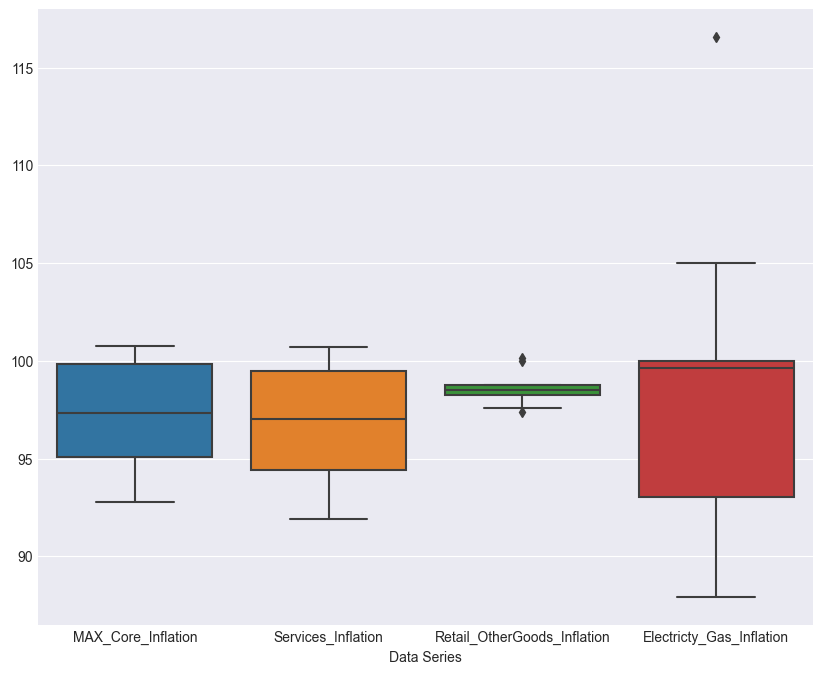

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(inflationRateDf_filtered.drop('year', axis=1))
plt.show()

There are outliers in Retail and Other Goods inflation as well as Electricity Gas Inflation which have to be taken into account for

### Dataset 3

In [24]:
# Get rid of last column which is unamed when loading csv
unemploymentRateDfP_filtered = unemploymentRateDf.iloc[-10:-1, :-1].reset_index()

# Create new column year which converts date from YYYY-MM-DD
unemploymentRateDfP_filtered['year'] = unemploymentRateDfP_filtered['date'].str[:4]
unemploymentRateDfP_filtered=unemploymentRateDfP_filtered[['year', 	' Unemployment Rate (%)']]
unemploymentRateDfP_filtered.rename(columns={' Unemployment Rate (%)': 'Unemployment_rate'}, inplace=True)


# Convert year to int value
unemploymentRateDfP_filtered['year'] = unemploymentRateDfP_filtered['year'].astype(int)

# Verify changes made
get_info(unemploymentRateDfP_filtered, "filtered unemployment rate")
unemploymentRateDfP_filtered

************************************************************ 
Information on filtered unemployment rate 
************************************************************

There are 9 rows and 2 columns in this dataset

The names of the columns are
- year (int32), na values: 0, unique values: 9
- Unemployment_rate (float64), na values: 0, unique values: 9


,year,Unemployment_rate
0,2013,3.860
1,2014,3.740
2,2015,3.790
3,2016,4.080
4,2017,4.200
5,2018,3.641
6,2019,3.100
7,2020,4.100
8,2021,3.540


<Axes: xlabel='year', ylabel='Unemployment_rate'>

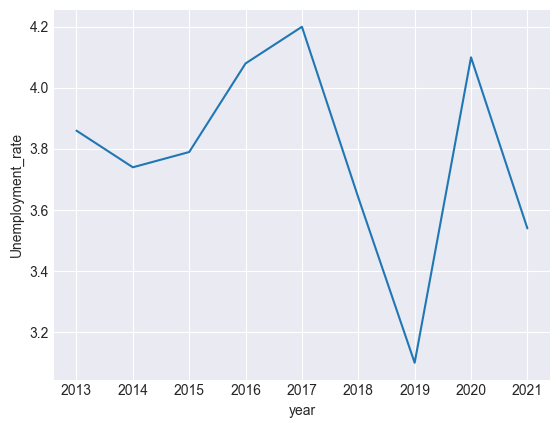

In [25]:
sns.lineplot(unemploymentRateDfP_filtered, x='year', y='Unemployment_rate')

### Dataset 4

In [44]:
GES_Df_nona = GES_Df.dropna()

GES_Df_nona = GES_Df_nona.groupby(['university', 'school', 'year'])[['gross_monthly_median']].median()

GES_Df_nona

gross_monthly_median
university                              school                                        year                      
Nanyang Technological University        College of Business (Nanyang Business School) 2013                3175.0
                                                                                      2014                3200.0
                                                                                      2015                3485.0
                                                                                      2016                3400.0
                                                                                      2017                3450.0
...                                                                                                          ...
Singapore University of Social Sciences S R Nathan School of Human Development        2021                3200.0
                                        School of Business                            2018                3000.0
                                                                                      2019                3000.0
                                                                                      2020                3081.5
                                                                                      2021                3300.0

[302 rows x 1 columns]

In [45]:
# Group by school and count the number of entries for each school
school_counts = GES_Df_nona.groupby(level=['university', 'school']).size()

# Get the schools with entries for all years from 2015 to 2021
schools_with_all_years = school_counts[school_counts == 9].index

GES_Df_filtered = GES_Df_nona.reset_index()

# Filter the DataFrame based on schools_with_all_years
filtered_data = GES_Df_filtered[GES_Df_filtered[['university', 'school']].
                                  apply(tuple, axis=1).
                                  isin(schools_with_all_years)]

filtered_data.reset_index(inplace=True, drop=True)

filtered_data

,university,school,year,gross_monthly_median
0,Nanyang Technological University,College of Business (Nanyang Business School),2013,3175.0
1,Nanyang Technological University,College of Business (Nanyang Business School),2014,3200.0
2,Nanyang Technological University,College of Business (Nanyang Business School),2015,3485.0
3,Nanyang Technological University,College of Business (Nanyang Business School),2016,3400.0
4,Nanyang Technological University,College of Business (Nanyang Business School),2017,3450.0
...,...,...,...,...
76,National University of Singapore,School of Design & Environment,2017,3000.0
77,National University of Singapore,School of Design & Environment,2018,3250.0
78,National University of Singapore,School of Design & Environment,2019,3350.0
79,National University of Singapore,School of Design & Environment,2020,3565.0


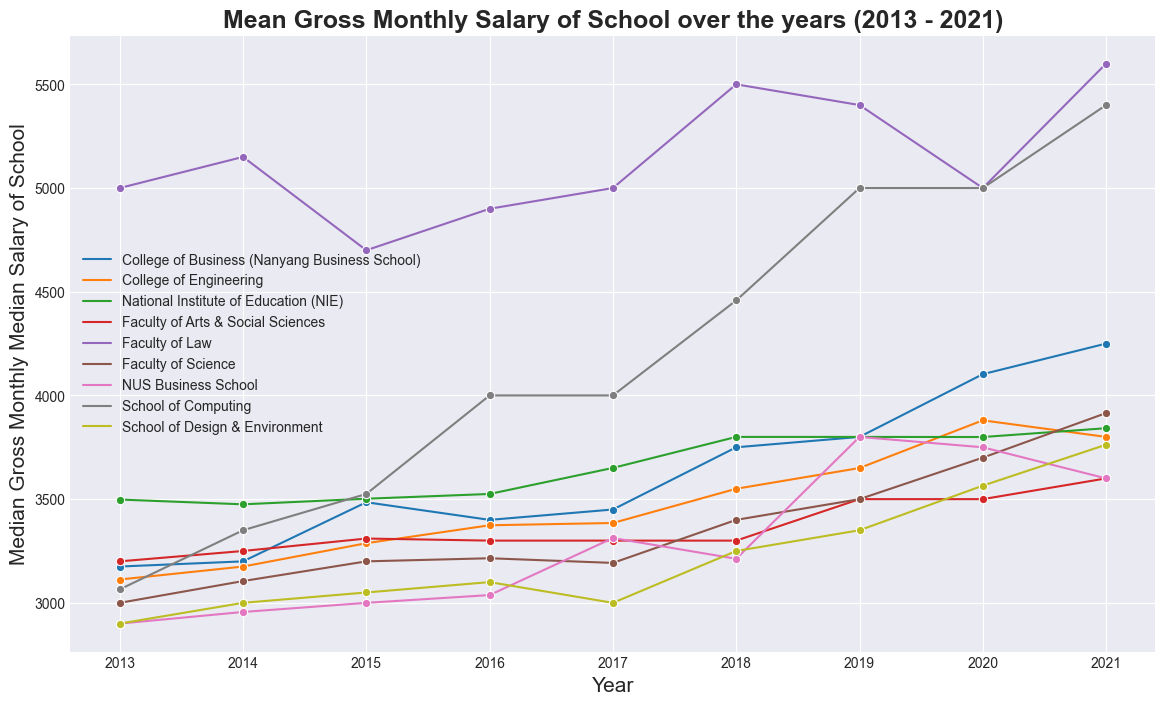

In [47]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='year', y='gross_monthly_median', hue='school',
             marker='o')

plt.ylabel('Median Gross Monthly Median Salary of School', fontsize = '15')
plt.xlabel('Year', fontsize = '15')
plt.title('Mean Gross Monthly Salary of School over the years (2013 - 2021)', fontsize = '18', fontweight ='bold')
plt.legend(loc='center left')
plt.show()

In [29]:
# datasets = [filtered_data, gdp_filtered, unemploymentRateDfP_filtered, inflationRateDf_filtered]

# final_df = datasets[0]

# for df in datasets[1:]:
#     final_df = pd.merge(final_df, df, on='year', how='inner')

# final_df = final_df.sort_values(by=['university', 'school', 'year']).reset_index(drop=True)
# final_df

In [30]:
average_salary = pd.DataFrame(filtered_data.groupby('year')['gross_monthly_median'].median().astype(int))
average_salary.reset_index(inplace=True)

average_salary

,year,gross_monthly_median
0,2013,3112
1,2014,3210
2,2015,3306
3,2016,3375
4,2017,3362
5,2018,3606
6,2019,3725
7,2020,3820
8,2021,3983


In [51]:
datasets = [filtered_data, gdp_filtered, unemploymentRateDfP_filtered, inflationRateDf_filtered]

final_df = datasets[0]

for df in datasets[1:]:
    final_df = pd.merge(final_df, df, on='year', how='inner')

# final_df = final_df.sort_values(by=['university', 'school', 'year']).reset_index(drop=True)
# final_df
final_df

,university,school,year,gross_monthly_median,Singapore_USD_Billion,World_USD_Billion,Unemployment_rate,MAX_Core_Inflation,Services_Inflation,Retail_OtherGoods_Inflation,Electricty_Gas_Inflation
0,Nanyang Technological University,College of Business (Nanyang Business School),2013,3175.0,307.576361,77714.723868,3.86,92.799,91.908571,97.593642,99.910059
1,Nanyang Technological University,College of Engineering,2013,3112.5,307.576361,77714.723868,3.86,92.799,91.908571,97.593642,99.910059
2,Nanyang Technological University,National Institute of Education (NIE),2013,3498.0,307.576361,77714.723868,3.86,92.799,91.908571,97.593642,99.910059
3,National University of Singapore,Faculty of Arts & Social Sciences,2013,3200.0,307.576361,77714.723868,3.86,92.799,91.908571,97.593642,99.910059
4,National University of Singapore,Faculty of Law,2013,5000.0,307.576361,77714.723868,3.86,92.799,91.908571,97.593642,99.910059
...,...,...,...,...,...,...,...,...,...,...,...
76,National University of Singapore,Faculty of Law,2021,5600.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
77,National University of Singapore,Faculty of Science,2021,3915.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
78,National University of Singapore,NUS Business School,2021,3600.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000
79,National University of Singapore,School of Computing,2021,5400.0,423.797101,97529.676807,3.54,100.769,100.710000,97.387000,93.026000


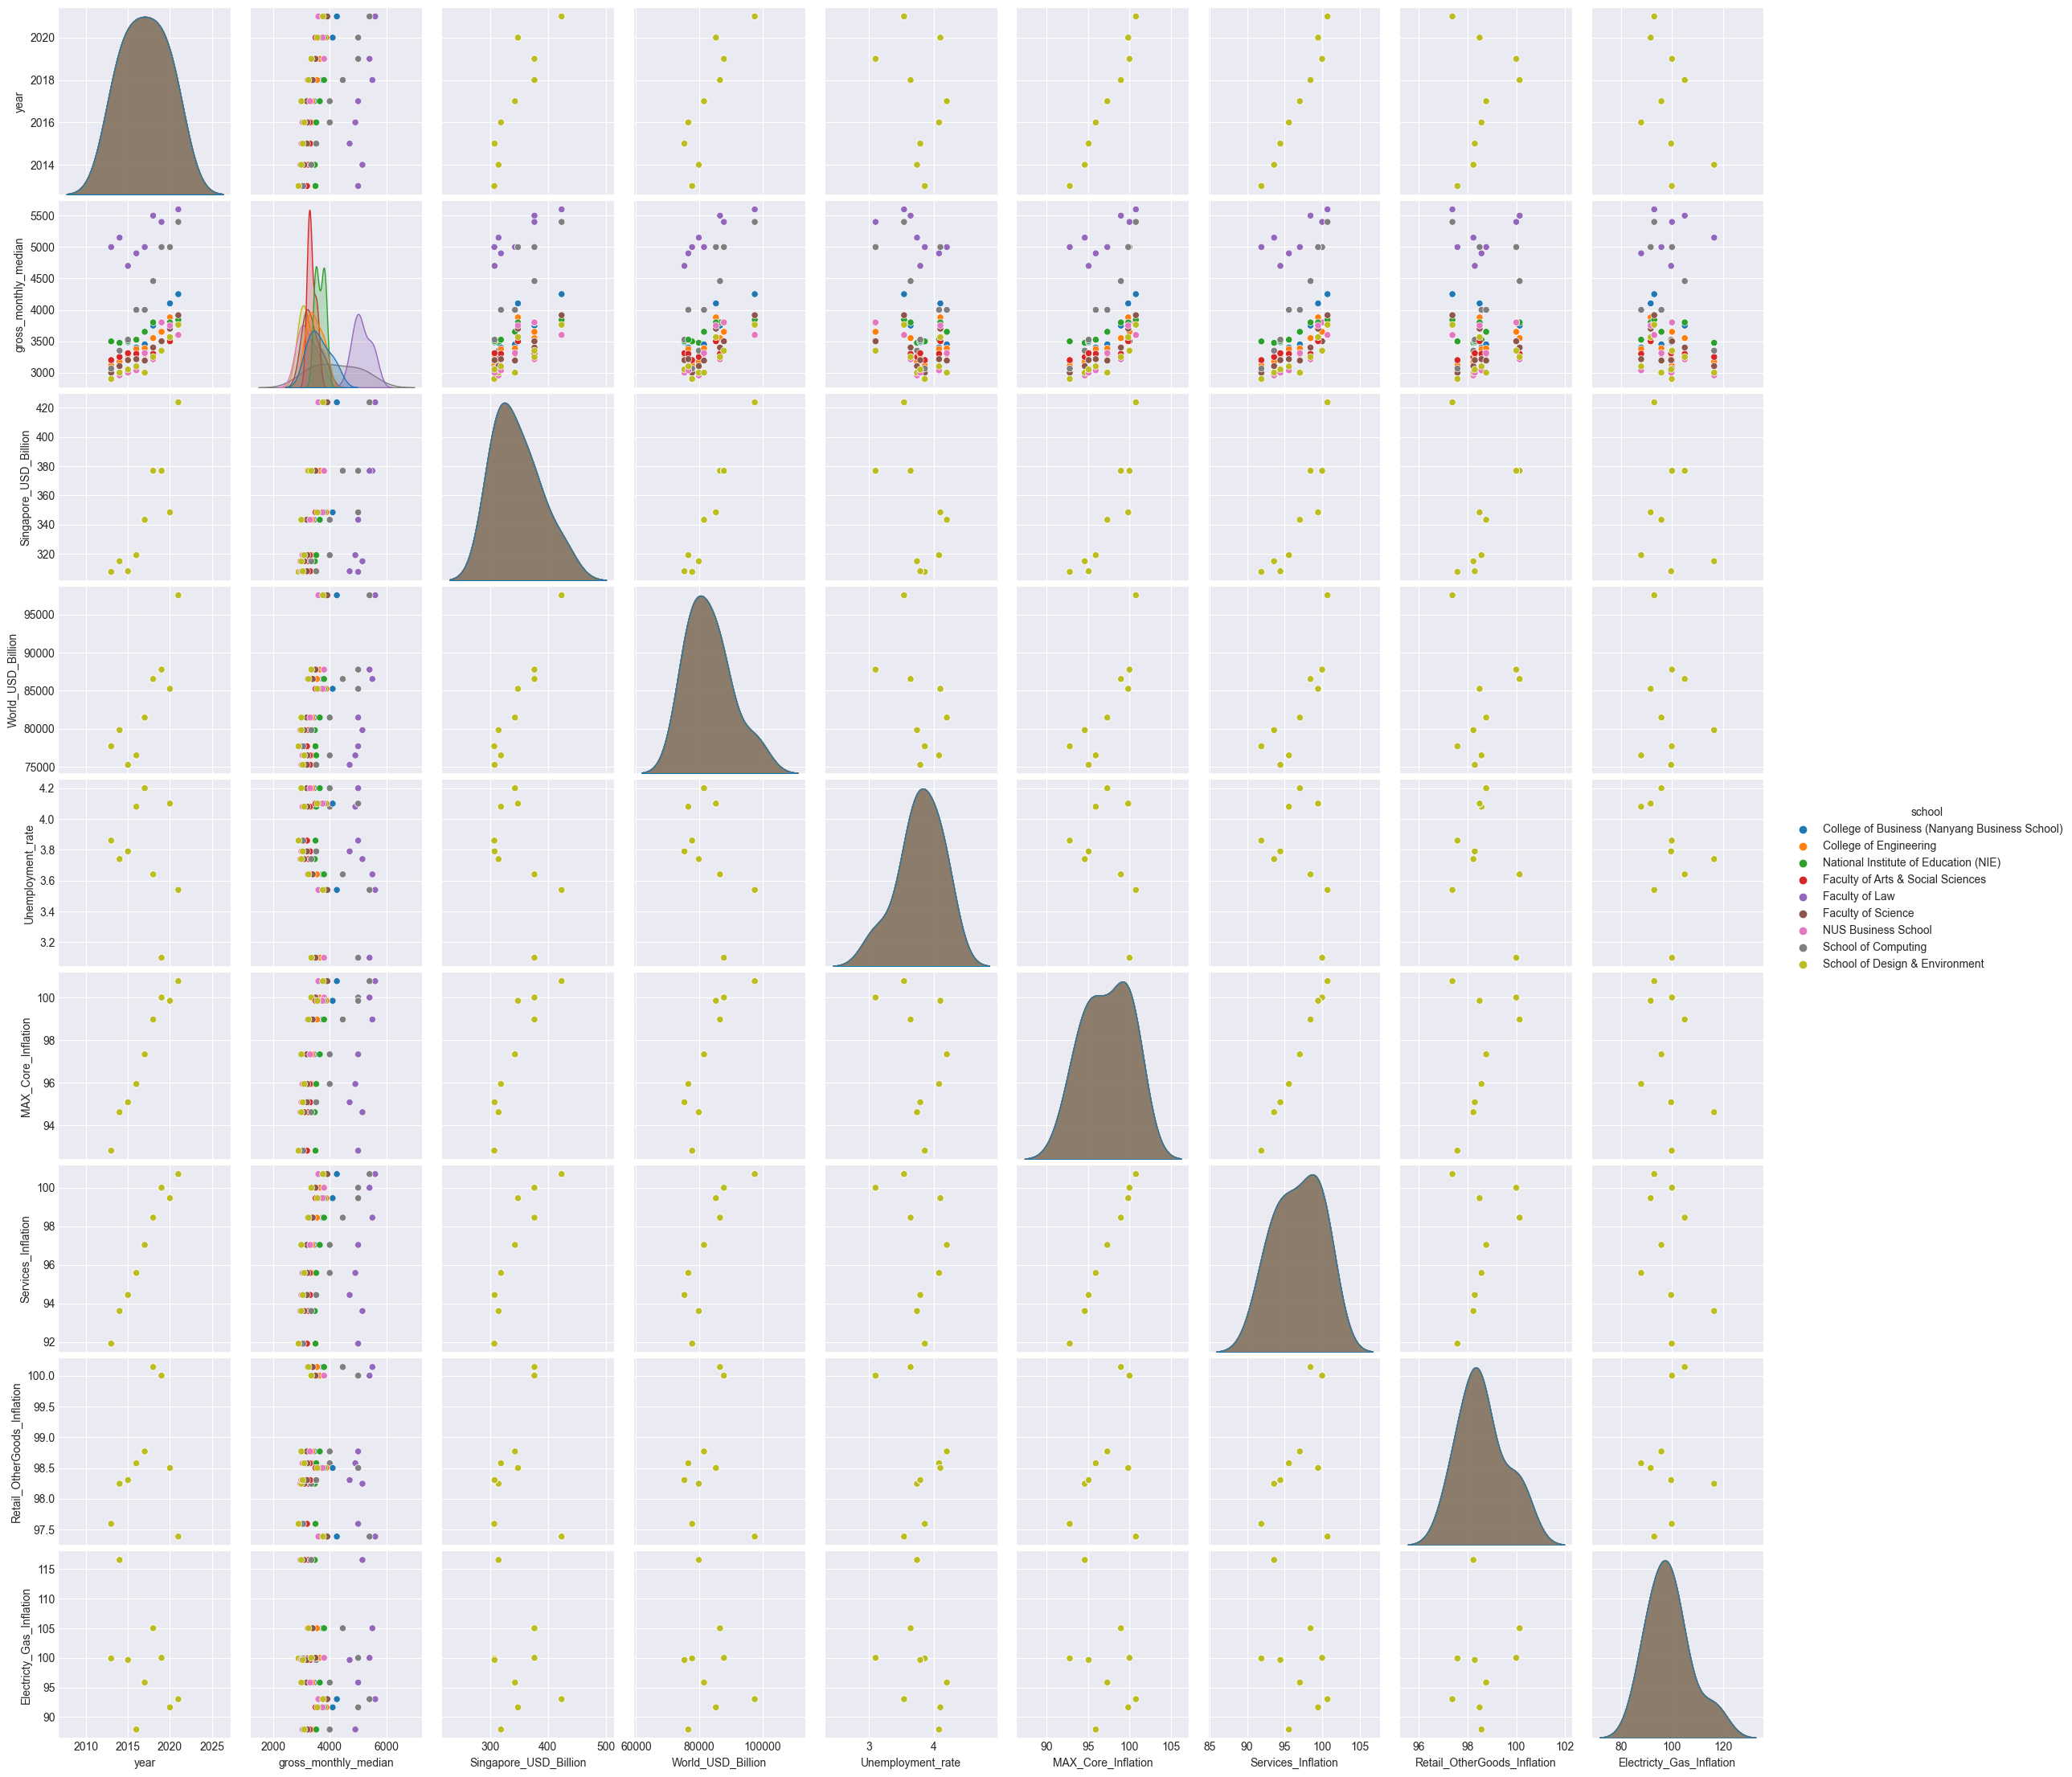

In [53]:
sns.pairplot(final_df, hue='school')
plt.show()

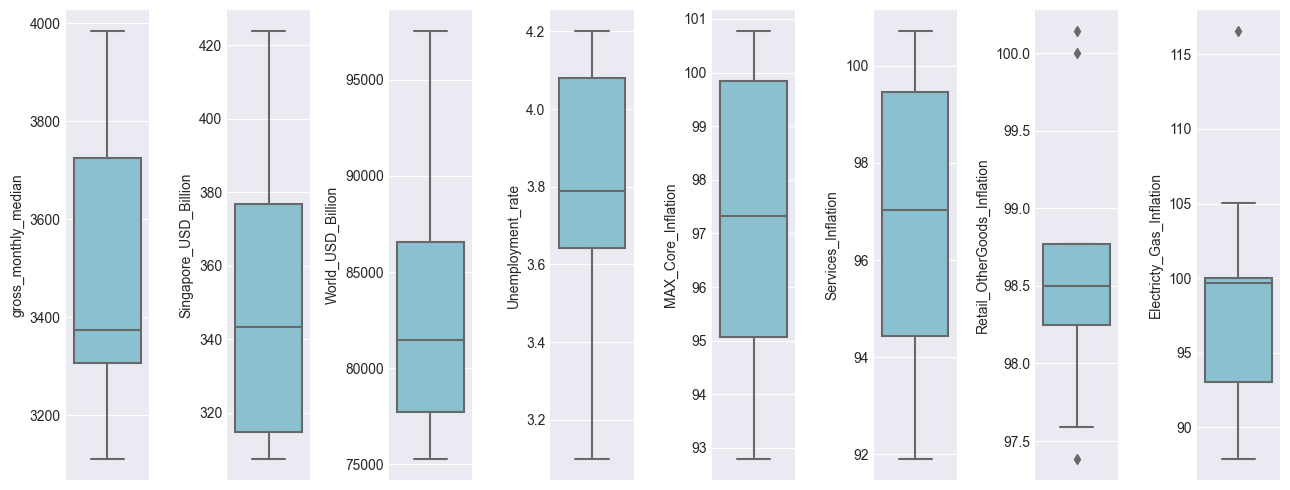

In [33]:
# Check for outliers 
fig, ax = plt.subplots(1,8, figsize=(13,5))
col = 0
cols = final_df.drop(columns=['year'])

for item in cols.columns :
    sns.boxplot(y=cols[item] ,color='#7FC7DB', ax=ax[col])
    col = col + 1

plt.tight_layout()
plt.show()

<hr>

## Graphs

The graph is going to show a line chart of the different gross median salary in each school over the years and each university

<hr>
<br>
The next graph will be a line chart of how gross monthly salary is projected to be due to Singapore GDP and World GDP

In [70]:
def plotRegressionLine(columns):
    for i, column in enumerate(columns):
        x = final_df[column]
        y = final_df['gross_monthly_median']
        ax[i].set_xlabel(column)  # Set x-label as the column name
        ax[i].set_ylabel('Gross Monthly Median')  # Set y-label
        sns.scatterplot(data=final_df, x=column, y='gross_monthly_median', hue='year', ax=ax[i])

        m, c = np.polyfit(x, y, deg=1)
        sns.lineplot(data=final_df, x=x, y=c+m*x, ax=ax[i])

        model = smf.ols(f"gross_monthly_median ~ {column}", data = final_df).fit()
        linearModEq = f"Y = {model.params[0]:.5} + {model.params[1]:.5}X\n RSquared = {model.rsquared:.5}"

        x_range = x.max() - x.min()
        y_range = y.max() - y.min()
        x_middle = (x.max() + x.min())/2
        x_pos = x.min() + 0.6 * x_range
        y_pos = y.min() + 0.8 * y_range
        
        ax[i].annotate(linearModEq, xy=(x_middle, c+m*x_middle), xytext=(x_pos, y_pos),
                    size=10, arrowprops=dict(facecolor='blue'))
        ax[i].legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=6)
        ax[i].set_title(f'Scatter Plot w Regression line of Gross Monthly Median against {column}', pad=30)


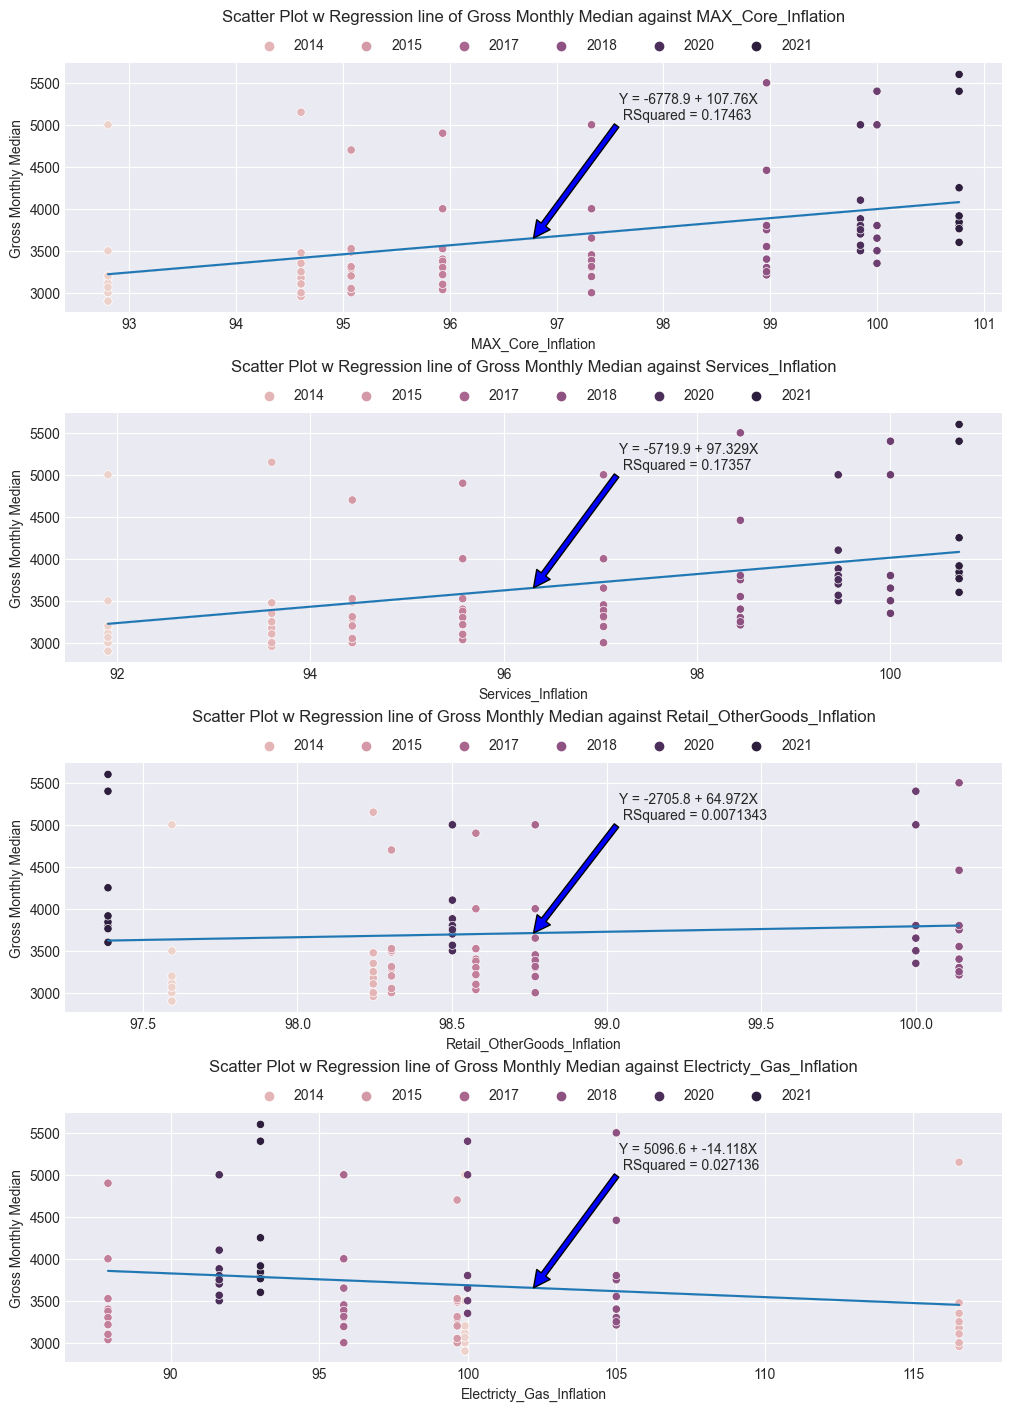

In [71]:
fig, ax = plt.subplots(4, 1, figsize=(10, 14), constrained_layout=True)

# Define the columns for inflation
inflation_columns = ['MAX_Core_Inflation',
                     'Services_Inflation',
                     'Retail_OtherGoods_Inflation',
                     'Electricty_Gas_Inflation']

# Iterate over columns and create scatter plots
plotRegressionLine(inflation_columns)

plt.show()

In [36]:
final_df.columns

Index(['year', 'gross_monthly_median', 'Singapore_USD_Billion',
       'World_USD_Billion', 'Unemployment_rate', 'MAX_Core_Inflation',
       'Services_Inflation', 'Retail_OtherGoods_Inflation',
       'Electricty_Gas_Inflation'],
      dtype='object')

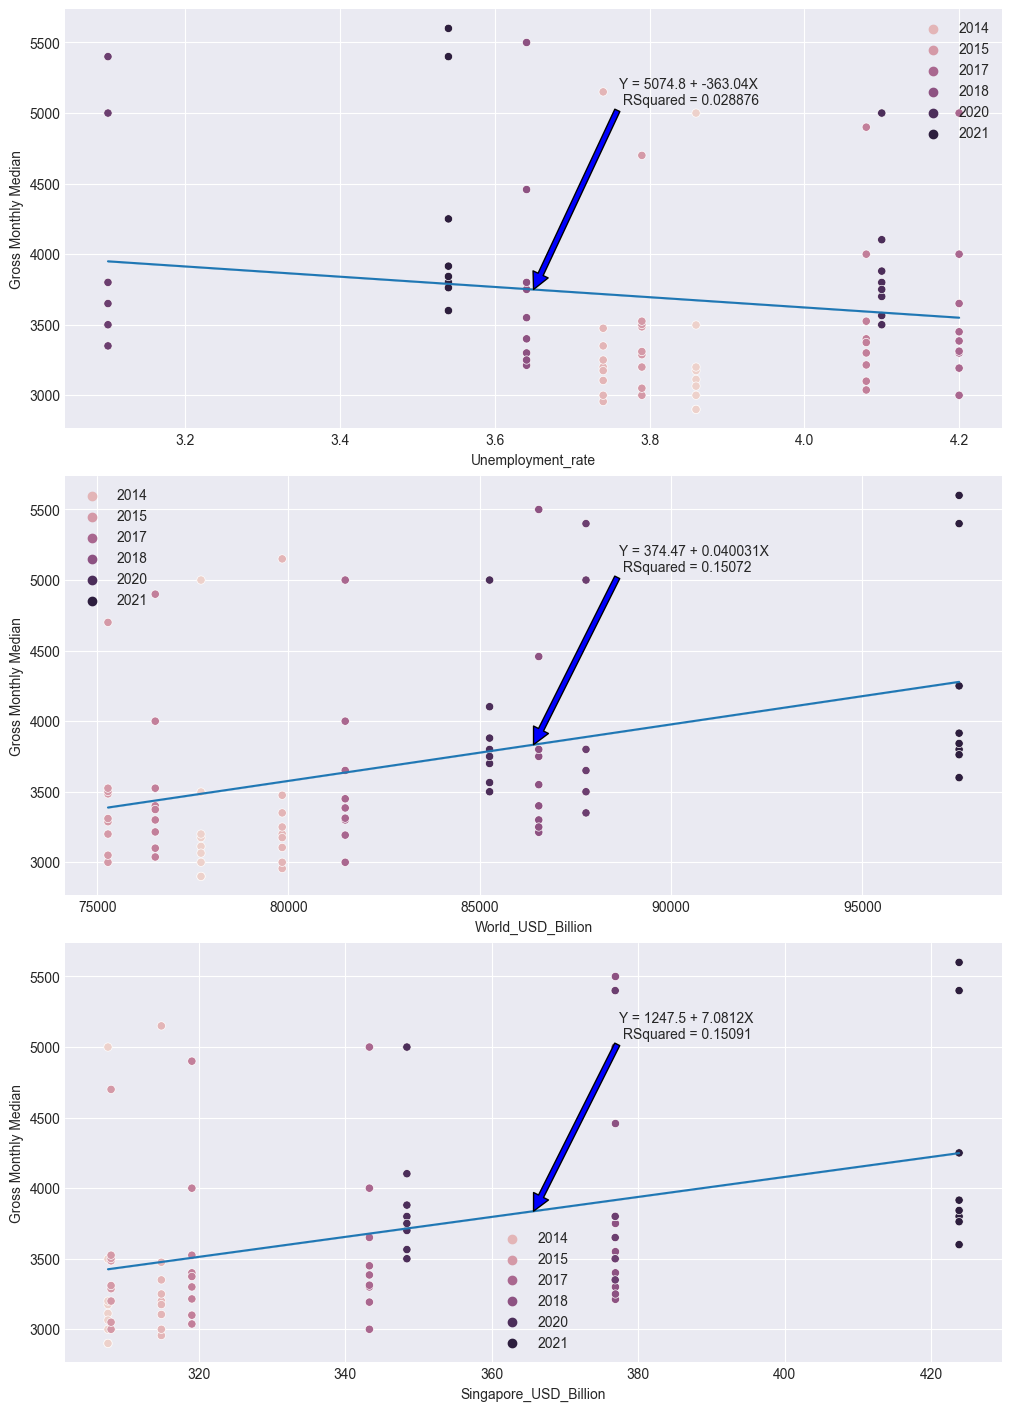

In [56]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14), constrained_layout=True)

# Define the columns for gdp and unemployment
GDP_and_Unemployment = ['Unemployment_rate',
                     'World_USD_Billion',
                     'Singapore_USD_Billion']
# Iterate over columns and create scatter plots
plotRegressionLine(GDP_and_Unemployment)

plt.show()